In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data=pd.read_csv("C:\\Users\\PCP\\Downloads\\train.csv")
test_data=pd.read_csv("C:\\Users\\PCP\\Downloads\\test.csv")

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Select columns with dtype 'object'
object_columns = train_data.select_dtypes(include='object').columns
print(object_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Drop less useful columns
drop_category_columns = ['Street', 'Alley', 'LandContour','Utilities','Condition2',
                    'RoofMatl','BsmtCond','Heating','Electrical','Functional','GarageQual','GarageCond','PavedDrive']
train_data.drop(columns=drop_category_columns, inplace=True)
na_columns = ['PoolQC', 'Fence', 'MiscFeature']
train_data.drop(columns=na_columns, inplace=True)

In [10]:
# Handle missing values in train data
medians = train_data.select_dtypes(include='number').median()
train_data.fillna(value=medians, inplace=True)
modes = train_data.select_dtypes(include='object').mode().iloc[0]
train_data.fillna(value=modes, inplace=True)

In [11]:
# Apply the same cleaning to test data
test_data.drop(columns=drop_category_columns, inplace=True)
test_data.drop(columns=na_columns, inplace=True)
medians1 = test_data.select_dtypes(include='number').median()
test_data.fillna(value=medians1, inplace=True)
modes1 = test_data.select_dtypes(include='object').mode().iloc[0]
test_data.fillna(value=modes1, inplace=True)

In [12]:
# Select relevant columns for training and testing
relevant_columns = ['Id',
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
    'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
    'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
    'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold', 'YrSold','SalePrice'
]
df_train = train_data[relevant_columns]

Missing Values in Train Data:
Id               0
OverallQual      0
GrLivArea        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GarageCars       0
GarageArea       0
YearBuilt        0
YearRemodAdd     0
Neighborhood     0
Condition1       0
LotArea          0
ExterQual        0
BsmtQual         0
KitchenQual      0
HeatingQC        0
Fireplaces       0
TotRmsAbvGrd     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
SaleType         0
SaleCondition    0
LotFrontage      0
MasVnrArea       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


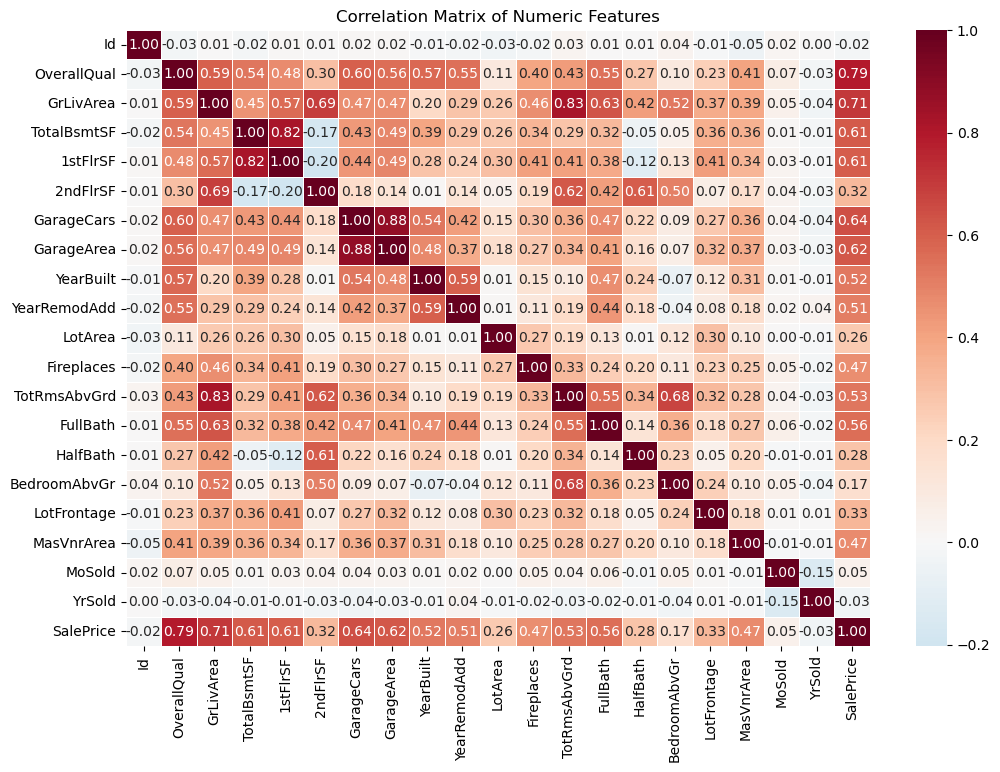

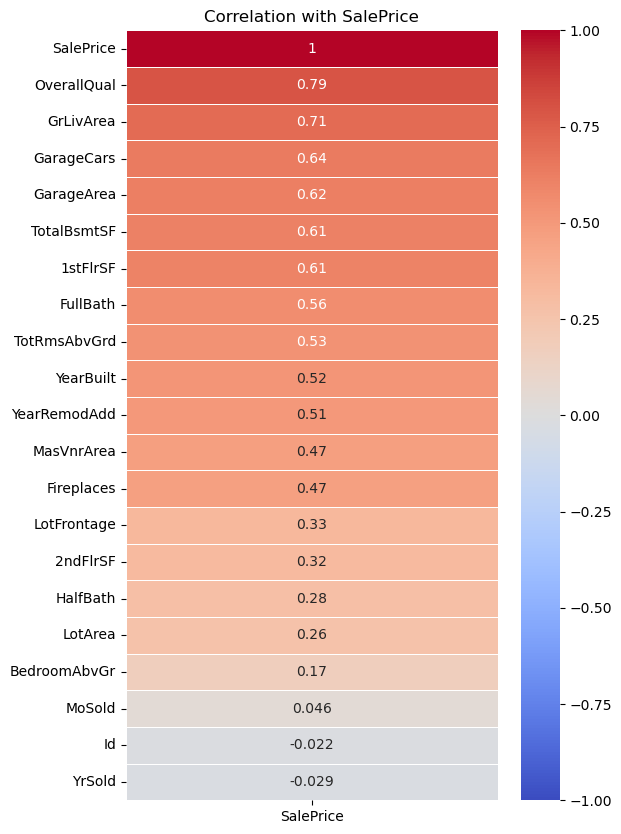

In [13]:
# Data Analysis and Visualization
print("Missing Values in Train Data:")
print(df_train.isnull().sum())

# Correlation matrix with more detailed visualization
correlation_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Heatmap specifically for SalePrice correlation
plt.figure(figsize=(6, 10))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation with SalePrice')
plt.show()


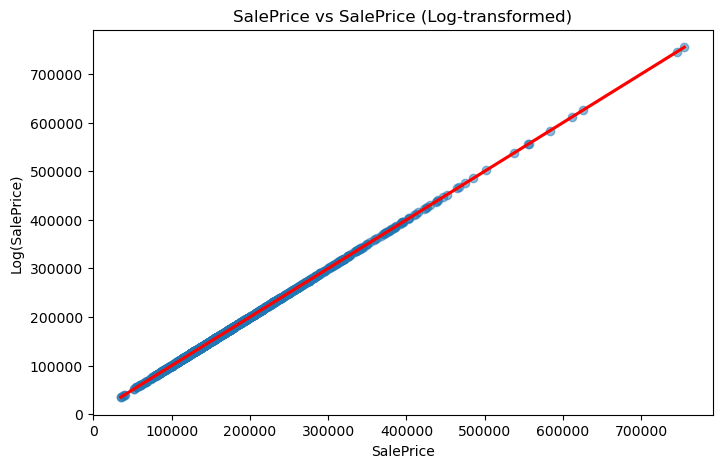

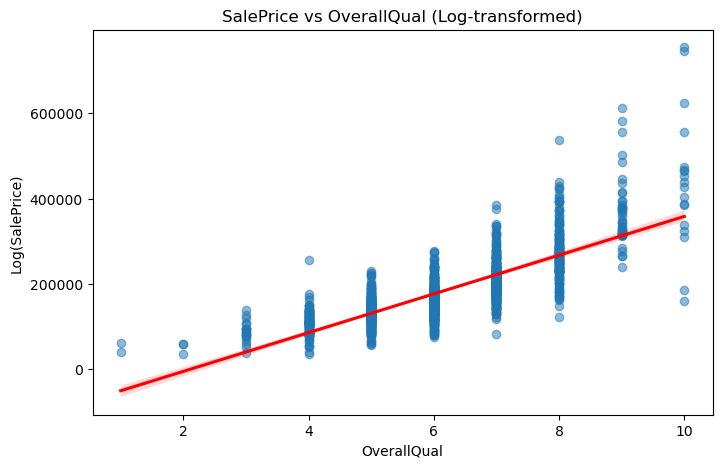

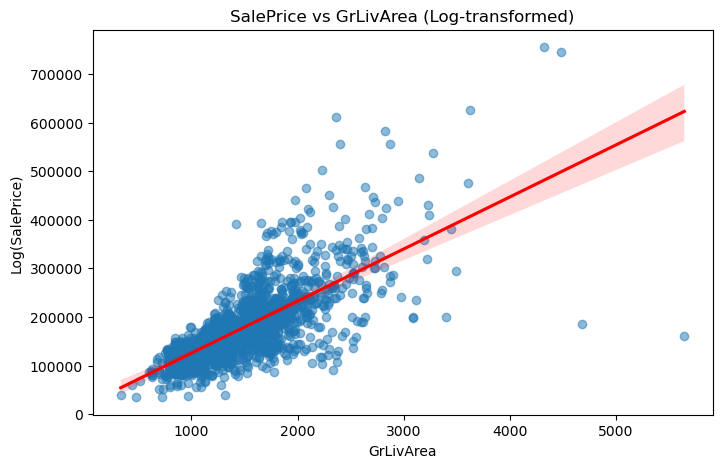

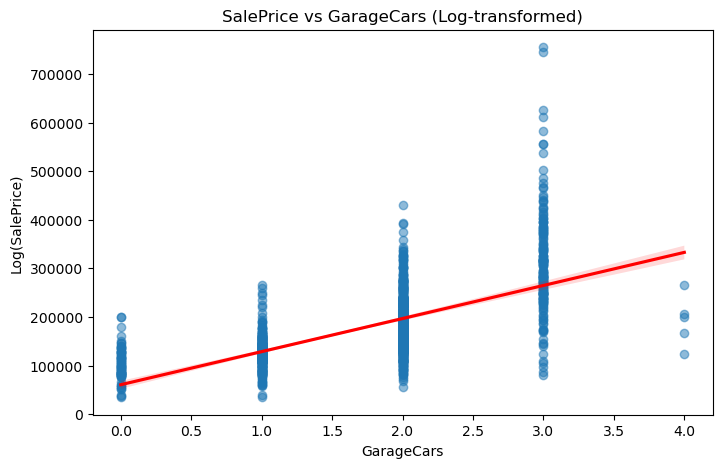

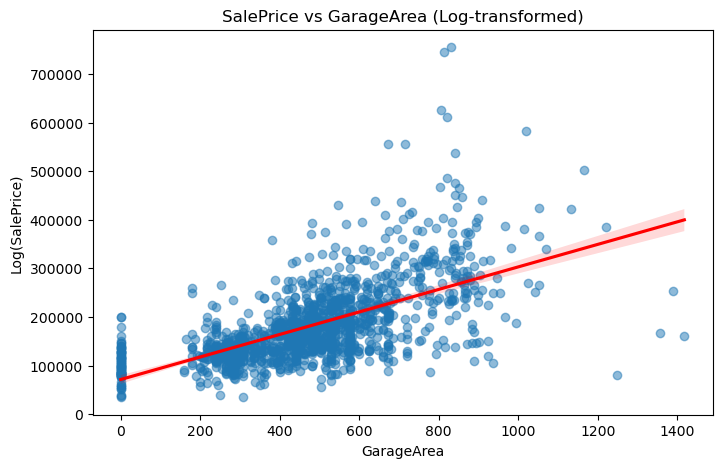

In [14]:
# Visualize top correlated features with SalePrice (log-transformed)
top_features = correlation_matrix['SalePrice'].abs().nlargest(5).index

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df_train, x=feature, y='SalePrice', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.title(f'SalePrice vs {feature} (Log-transformed)')
    plt.xlabel(feature)
    plt.ylabel('Log(SalePrice)')
    plt.show()


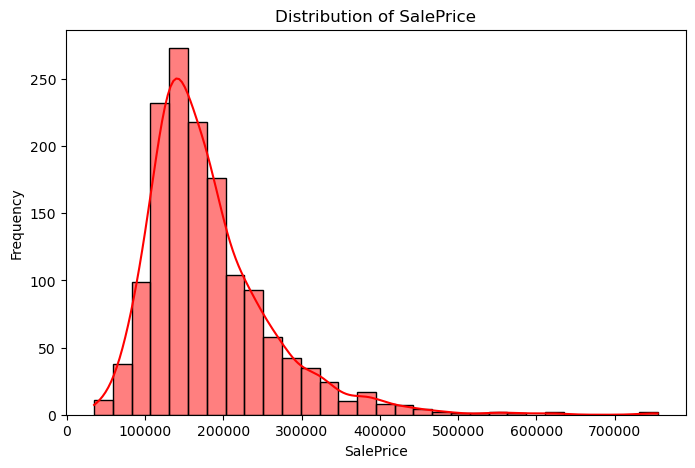

In [15]:
# SalePrice Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_train['SalePrice'], bins=30, kde=True,color='red')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# Feature Engineering
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# Prepare features and target
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate features
categorical_features = ['Neighborhood', 'Condition1', 'ExterQual', 'BsmtQual', 'KitchenQual', 
                        'HeatingQC', 'SaleType', 'SaleCondition', 'RoofStyle', 'Exterior1st', 'Exterior2nd']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [feat for feat in numerical_features if feat not in categorical_features]

# Preprocessor and Model Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [18]:
# Linear Regression Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Linear Regression Validation MSE: {mse}')

Linear Regression Validation MSE: 0.022979533277452523


In [19]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestRegressor()
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)
print(f'Best parameters for Random Forest: {rf_search.best_params_}')
y_pred_rf = rf_search.predict(X_val)
print(f'Random Forest Validation MSE: {mean_squared_error(y_val, y_pred_rf)}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Random Forest: {'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 10}
Random Forest Validation MSE: 0.029947872059536883


In [20]:
# Random Forest Model with tuned parameters
final_rf_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)

final_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_rf_model)
])
final_rf_pipeline.fit(X_train, y_train)
y_pred_rf = final_rf_pipeline.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f'Random Forest Validation MSE: {mse_rf}')

Random Forest Validation MSE: 0.03013826381839533


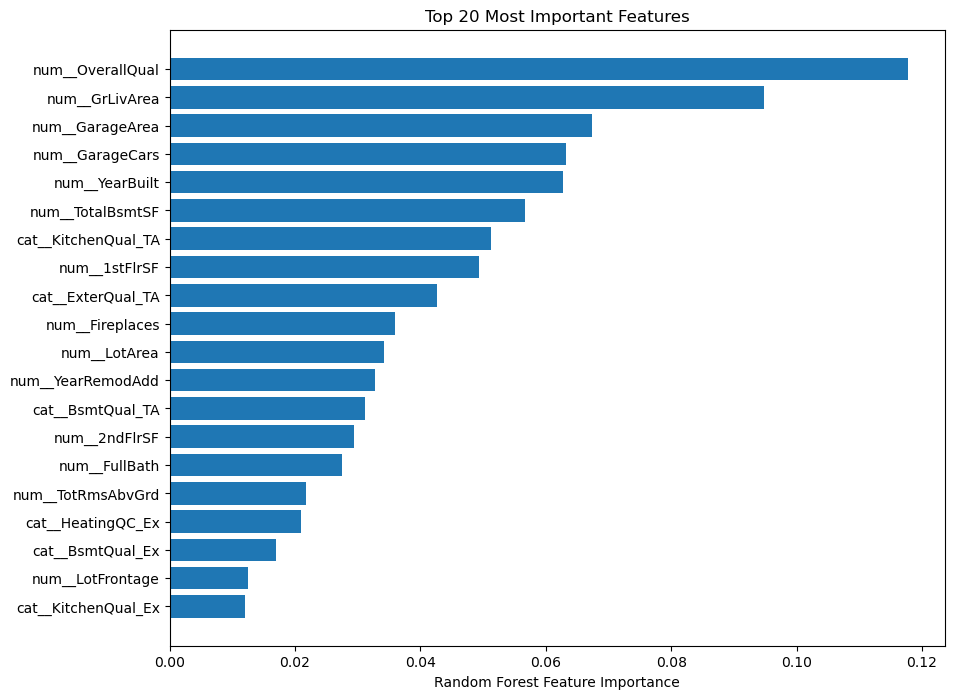

In [22]:
# Get the feature names after preprocessing (including one-hot encoding of categorical features)
feature_names = preprocessor.get_feature_names_out()
importances = final_rf_model.feature_importances_
# Now proceed with sorting the feature importances
sorted_idx = importances.argsort()

# Select the top 20 most important features
top_20_idx = sorted_idx[-20:]

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names[top_20_idx], importances[top_20_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 20 Most Important Features")
plt.show()



In [23]:
# XGBoost Model
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

xgb_search = RandomizedSearchCV(xgb_pipeline, xgb_param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
xgb_search.fit(X_train, y_train)
print(f'Best parameters for XGBoost: {xgb_search.best_params_}')
y_pred_xgb = xgb_search.predict(X_val)
print(f'XGBoost Validation MSE: {mean_squared_error(y_val, y_pred_xgb)}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for XGBoost: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__max_depth': 9, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.8}
XGBoost Validation MSE: 0.35828337570450436


In [24]:
# Lasso Regression Model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lasso_model)
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_val)
mse_lasso = mean_squared_error(y_val, y_pred_lasso, squared=False)
print(f'Lasso Regression Validation RMSE: {mse_lasso}')

Lasso Regression Validation RMSE: 0.24072046225894242


In [25]:
# Prepare test data
df_test = test_data[relevant_columns[:-1]]  # Exclude 'SalePrice'
X_test_transformed = preprocessor.transform(df_test)

# Predict on test data using the best model
y_test_pred = final_rf_pipeline.predict(df_test)# random forest 
y_test_pred_original_scale = np.expm1(y_test_pred)

In [26]:
# Prepare Submission
submission_df = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_test_pred_original_scale
})
#submission_df.to_csv('submission.csv', index=False)
submission_df

,Id,SalePrice
0,1461,124026.329745
1,1462,143347.779936
2,1463,178853.626542
3,1464,184710.238826
4,1465,199171.887585
...,...,...
1454,2915,94543.396838
1455,2916,99438.231037
1456,2917,156520.739336
1457,2918,126747.883787
